# n-Armed Bandit Problem
Based on:
- https://github.com/Curt-Park/reinforcement_learning_an_introduction/blob/master/ch02_multi-armed_bandits/multi-armed_bandits.ipynb  
- Reinforcement Learning: An Introduction R. Sutton, and A. Barto. The MIT Press, Second edition, (2018)
- DSS_RL.pptx

In [75]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Stationary problem
### Reward distribution

In [76]:
N_arm = 10
n_step = 2000 # Number of steps in one game
def generate_rewards(N_arm, n_step):
    q_star = np.random.normal(0, 1, N_arm) # stationary expected values
    Rewards = []
    for a in q_star:
        Rewards.append(np.random.normal(a, 1, n_step))
    Rewards = np.transpose(Rewards)
    return Rewards

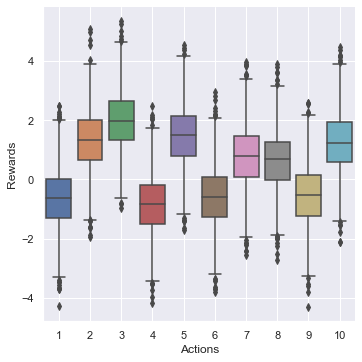

In [77]:
df = pd.DataFrame(generate_rewards(N_arm, n_step))
Reward_dist_plot = sns.catplot(data=df, kind="box")
x = plt.xlabel("Actions")
y = plt.ylabel("Rewards")
plt.grid(True)
actions_lables = Reward_dist_plot.set(xticklabels=np.arange(1,N_arm+1))

### $\epsilon$ - greedy algorithm

In [78]:
def play_one_game(N_arm, n_step, epsilon, Start_Q_value=0):
    
    q_star = np.random.normal(0, 1, N_arm) # stationary expected values
    optimal_action = np.argmax(q_star, axis = 0) 

    Q = Start_Q_value*np.ones(N_arm)
    N = np.zeros(N_arm)
    
    actions_opt = np.zeros(n_step)
    reward = np.zeros(n_step)

    for step in range(0, n_step):
        greedy_action = np.argmax(Q)
        random_action = np.random.randint(0, N_arm-1)
        a = np.random.choice([greedy_action, random_action], p=[1-epsilon, epsilon])
        reward[step] = np.random.normal(q_star[a], 1)
        actions_opt[step] = (a == optimal_action)
        N[a] += 1
        Q[a] += (1/N[a])*(reward[step] - Q[a])
    
    return reward, actions_opt

In [79]:
def play_n_game(N_arm, n_step, epsilon, N_games, Start_Q_value=0):
    avg_rew = []
    avg_opt_act = []
    for game in range(N_games):
        a, b = play_one_game(N_arm, n_step, epsilon)
        avg_rew.append(a)
        avg_opt_act.append(b)
    return avg_rew, avg_opt_act
    

### Different epsilon

In [80]:
N_arm = 10
n_step = 1000
N_games = 2000

avg_rew01, per_opt01 = play_n_game(N_arm, n_step, 0.1, N_games)
avg_rew001, per_opt001 = play_n_game(N_arm, n_step, 0.01, N_games)
avg_rew_greedy, per_opt_greedy = play_n_game(N_arm, n_step, 0, N_games)

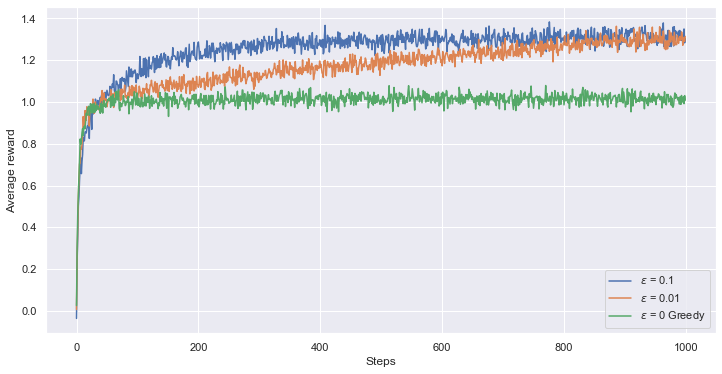

In [81]:
figsize=(12, 6)
plt.figure(figsize=figsize)

pl1 = plt.plot(np.mean(avg_rew01, axis=0), label='$\epsilon$ = 0.1')
pl2 = plt.plot(np.mean(avg_rew001, axis=0), label='$\epsilon$ = 0.01')
pl3 = plt.plot(np.mean(avg_rew_greedy, axis=0), label='$\epsilon$ = 0 Greedy')

plt.legend()
plt.grid(True)
plt.ylabel("Average reward")
plt.xlabel("Steps")
plt.show()

In [82]:
percentage_optimal_01 = 100*(np.sum(per_opt01, axis=0))/N_games
percentage_optimal_001 = 100*(np.sum(per_opt001, axis=0))/N_games
percentage_optimal_greedy = 100*(np.sum(per_opt_greedy, axis=0))/N_games

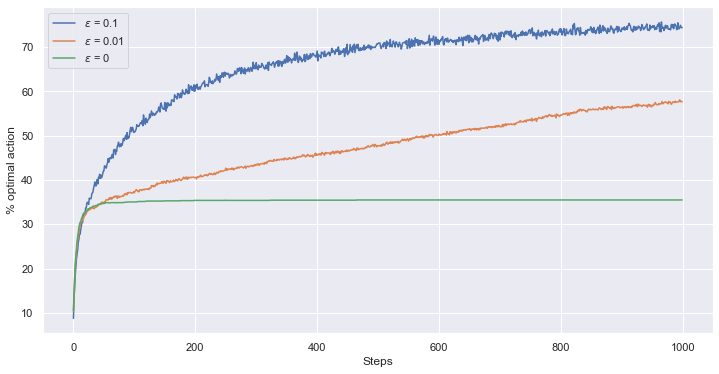

In [83]:
figsize=(12, 6)
plt.figure(figsize=figsize)
percentage_optimal = 100*(np.sum(avg_opt_act01, axis=0))/N_games

pl1 = plt.plot(percentage_optimal_01, label='$\epsilon$ = 0.1')
pl2 = plt.plot(percentage_optimal_001, label='$\epsilon$ = 0.01')
pl3 = plt.plot(percentage_optimal_greedy, label='$\epsilon$ = 0')

plt.legend()
plt.grid(True)
plt.ylabel("% optimal action")
plt.xlabel("Steps")
plt.show()

## Non stationary problem. Random walk

Change expected values in every block

In [140]:
def play_one_game_random_walk(N_arm, N_steps_per_block, N_blocks, epsilon = 0.1, Start_Q_value=0):
    n_step = N_steps_per_block*N_blocks
    q_star = np.random.normal(0, 1, (N_arm, N_blocks)) # expected values for each block
    blocks_idx = np.repeat(np.arange(0, N_blocks), N_steps_per_block)
    optimal_action = np.argmax(q_star, axis=1)

    Q = Start_Q_value*np.ones(N_arm)
    N = np.zeros(N_arm)

    actions_opt = np.zeros(n_step)
    reward = np.zeros(n_step)

    for step in range(0, n_step):
        cur_block_num = blocks_idx[step]
        greedy_action = np.argmax(Q)
        random_action = np.random.randint(0, N_arm-1)
        a = np.random.choice([greedy_action, random_action], p=[1-epsilon, epsilon])
        reward[step] = np.random.normal(q_star[a, cur_block_num], 1)
        actions_opt[step] = (a == optimal_action[cur_block_num])
        N[a] += 1
        Q[a] += (1/N[a])*(reward[step] - Q[a])
    return reward, actions_opt

In [141]:
def play_n_game_random_walk(N_games, N_arm, N_steps_per_block, N_blocks, epsilon = 0.1, Start_Q_value=0):
    avg_rew = []
    avg_opt_act = []
    for game in range(N_games):
        a, b = play_one_game_random_walk(N_arm, N_steps_per_block, N_blocks, epsilon, Start_Q_value)
        avg_rew.append(a)
        avg_opt_act.append(b)
    return avg_rew, avg_opt_act

In [150]:
N_arm = 10
N_steps_per_block = 100
N_blocks = 10
N_games = 2000

rewards, optimal = play_n_game_random_walk(N_games, N_arm, N_steps_per_block, N_blocks)
average_reward = np.mean(rewards, axis=0)
percentage_optimal = 100*(np.sum(optimal, axis=0))/N_games

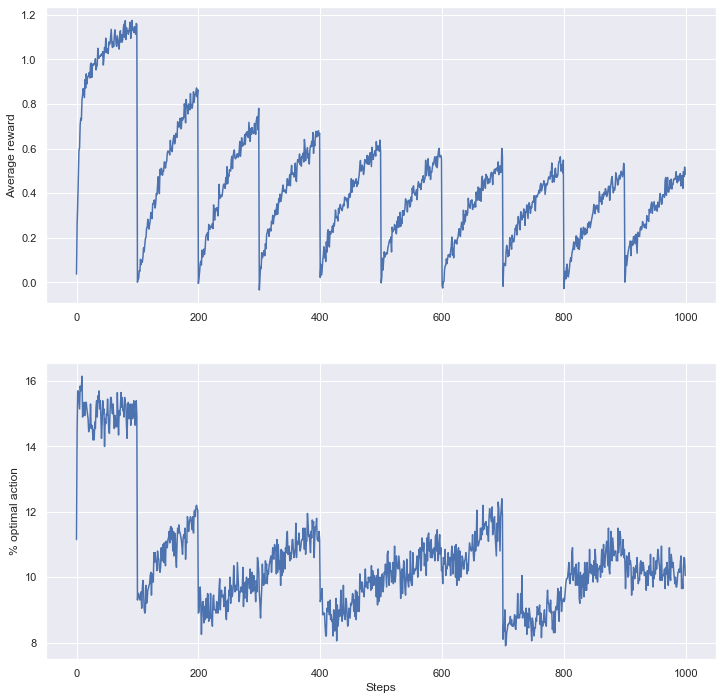

In [151]:
figsize=(12, 12)
plt.figure(figsize=figsize)

plt.subplot(211)
plt.plot(average_reward) 
plt.ylabel("Average reward")

plt.subplot(212)
plt.plot(percentage_optimal)
plt.ylabel("% optimal action") 

plt.grid(True)
plt.xlabel("Steps")
plt.show()